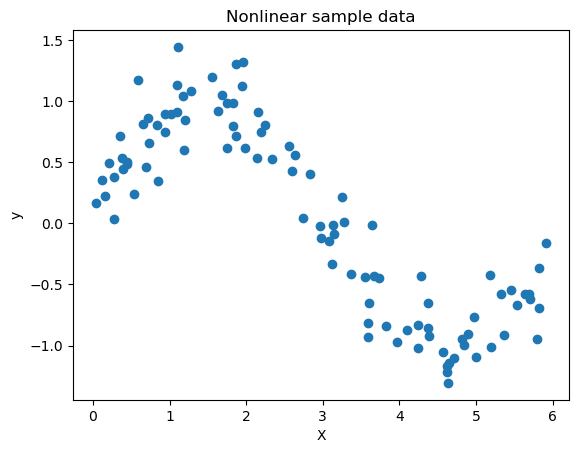

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV

np.random.seed(42)

num_samples = 100

# generate the independent variable (x) as a random sample from a uniform distribution
X = np.random.uniform(low=0.0, high=6, size=num_samples)

# generate the dependent variable (y) as sin(x) with some gaussian noise
noise = np.random.normal(scale=0.25, size=num_samples)
y = np.sin(X).ravel() + noise

X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

# plot sample data
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Nonlinear sample data')
plt.show()   

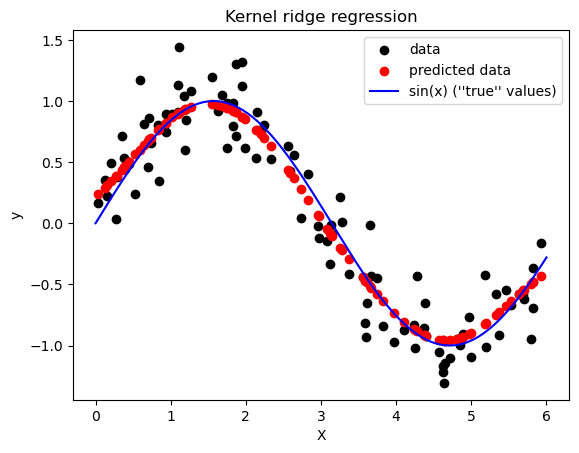

In [4]:
# Fit a ridge regression model with gaussian kernel
# Use grid-search cross-validation to find good parameter combinations alpha (regularization) and gamma = 1/sigma

kr_cv = GridSearchCV(
    KernelRidge(kernel="rbf", gamma=0.1),    
    param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3], "gamma": np.linspace(1, 100, 10)},
)
kr_cv.fit(X, y)
y_train_pred = kr_cv.predict(X)

plt.scatter(X, y, c='k', label="data")
plt.scatter(X, y_train_pred, c='r', label="predicted data")

X_plot = np.linspace(0, 6, 1000)[:, None]
plt.plot(X_plot, np.sin(X_plot).ravel(), c='b', label="sin(x) (''true'' values)")

plt.xlabel("X")
plt.ylabel("y")
plt.title("Kernel ridge regression")
plt.legend()